In [2]:
import tensorflow.keras as keras
import numpy as np
import os
import PIL
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [3]:
indata = keras.datasets.mnist.load_data()

In [4]:
len(indata[1][1])

10000

### Split the data into a training set and a test set

In [5]:
training_data = indata[0]
test_data = indata[1]


### Create the neural network model that we'll use

In [187]:
input_layer = keras.layers.Input(shape=(28, 28, 1))
model = keras.layers.Conv2D(32, (3,3))(input_layer)
model = keras.layers.MaxPooling2D()(model)
model = keras.layers.Conv2D(64, (3,3))(model)
model = keras.layers.MaxPooling2D()(model)
model = keras.layers.Flatten()(model)
model = keras.layers.Dense(128)(model)
model = keras.layers.Dropout(0.5)(model)
model = keras.layers.Dense(10, activation='softmax')(model)

model = keras.models.Model(inputs=[input_layer], outputs=[model])

In [188]:
adam = keras.optimizers.Adam()

In [189]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'],
             )

### Look at the model structure

In [190]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2049

### Separate the training images from the training targets

In [10]:
training_data_images = np.array(training_data[0])
training_data_targets = np.array(training_data[1])

### Train the model 
Feed the images to the network and train it 

In [12]:
model.fit(training_data_images.reshape(-1, 28, 28, 1)/255., training_data_targets,
         epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5025 - acc: 0.8815
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0949 - acc: 0.9721
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0749 - acc: 0.9773
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0636 - acc: 0.9804
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0562 - acc: 0.9829


In [13]:
training_data[1][:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now test our model on the set of data that was held out
How well does it do with images it has never seen before?

In [185]:
Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(Y_pred, axis=1)

In [186]:
print(classification_report(test_data[1][:], y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       980
           1       0.50      0.00      0.00      1135
           2       0.92      0.55      0.69      1032
           3       0.53      0.81      0.64      1010
           4       0.26      0.38      0.31       982
           5       0.79      0.90      0.84       892
           6       0.86      0.83      0.85       958
           7       0.83      0.54      0.65      1028
           8       0.85      0.78      0.82       974
           9       0.45      0.96      0.62      1009

    accuracy                           0.62     10000
   macro avg       0.68      0.64      0.61     10000
weighted avg       0.68      0.62      0.60     10000



### Mount the Google Drive with the edited images

In [16]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google.colab'

In [17]:
indir = '/content/drive/MyDrive/numbers/2/'
student_photos = []
student_photos_arrays = []

for infile in os.listdir(indir):
    if infile[-3:] == 'png':
        student_photos.append(PIL.Image.open(indir+infile))
        student_photos_arrays.append(np.array(PIL.Image.open(indir+infile)))
        

How many images of the number 2 are there?

In [18]:
len(student_photos)

9

### Take a look at the original images

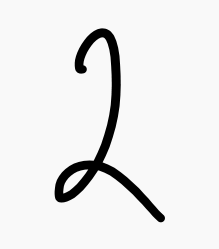

In [19]:
student_photos[1]

### The 'raw' data comprising the image

In [24]:
np.array(student_photos[1])

array([[[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       ...,

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]]

In [25]:
student_photos_arrays[1].shape

(249, 219, 3)

In [23]:
temp_input = np.array(student_photos[1].resize((28,28))).reshape(-1, 28, 28, 1)
temp_input[temp_input < 0.1] = 0
model.predict(temp_input)

array([[1.3511301e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

What happened here? 4 outputs with only 1 image input?

### What does our original data look like?

In [26]:
print('Original data:', training_data[0].shape)
print('Our data:', student_photos_arrays[0].shape)

Original data: (60000, 28, 28)
Our data: (332, 332)


### What about the actual data itself?

In [27]:
training_data[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [28]:
student_photos_arrays[0]

array([[231, 232, 236, ..., 245, 247, 248],
       [233, 234, 235, ..., 245, 248, 249],
       [234, 234, 235, ..., 245, 247, 247],
       ...,
       [239, 242, 242, ..., 241, 240, 240],
       [236, 237, 238, ..., 238, 238, 240],
       [237, 237, 238, ..., 236, 238, 241]], dtype=uint8)

### What's different about these two?
Will that impact our model and our predictions?

### Let's try out our data

In [29]:
image_size = 28
indir = '/content/drive/MyDrive/numbers/'

def edit_photo(inphoto):
    out = inphoto - 255
    out *= -1
    out /= 255.
    #out[out < 0.1] = 0.0
    return out
    
input_photos = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = edit_photo)
photos = input_photos.flow_from_directory(indir, 
                                          shuffle=False,
                                          color_mode='grayscale', #all ifcb images are grayscale
                                          class_mode='sparse', #there are multiple classes of images (i.e. > 2)
                                          target_size=(image_size,image_size),  #squish/stretch images to this size
                                          batch_size=1)

Found 81 images belonging to 10 classes.


### Here's a look at our input data

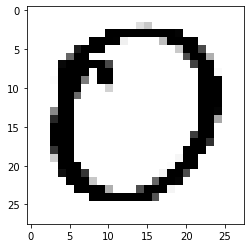

In [30]:
plt.imshow(photos.next()[0][0].reshape(28,28), cmap='gray_r')

In [31]:
photos.reset()
predictions = model.predict_generator(photos)

In [32]:
for idx, indiv_number in enumerate(predictions):
    print(np.argmax(indiv_number), photos.classes[idx], indiv_number)

0 0 [7.0635474e-01 1.3277174e-09 3.5732158e-03 2.9005358e-01 3.6855383e-14
 1.1152862e-06 4.1998979e-07 4.6025482e-07 7.7939092e-07 1.5678988e-05]
0 0 [9.3153936e-01 2.1397802e-10 1.0920230e-03 6.7309782e-02 5.2485817e-14
 2.3960954e-06 4.1552445e-07 8.6407300e-07 8.8713801e-07 5.4354863e-05]
0 0 [9.2844731e-01 2.2202198e-06 5.2794931e-05 9.3674695e-05 2.3347439e-04
 2.7688630e-03 3.2175954e-02 2.5490621e-07 1.5393543e-02 2.0832013e-02]
0 0 [9.6615815e-01 2.2369130e-05 1.4546634e-04 8.8466390e-05 1.6902966e-04
 1.4818957e-03 2.1150224e-02 1.1371480e-06 4.4371421e-03 6.3461973e-03]
0 0 [9.7885567e-01 3.9112792e-06 6.8475716e-03 3.0123040e-03 6.6373872e-07
 1.2313233e-03 1.0906772e-03 5.2293448e-04 3.0350077e-03 5.3999447e-03]
0 0 [9.8617691e-01 8.7525288e-05 5.2395388e-03 7.7125710e-04 3.3533925e-06
 6.2917318e-04 1.9544568e-03 7.1175781e-04 8.2012557e-04 3.6058505e-03]
1 1 [1.1078556e-03 9.8917830e-01 2.6345352e-04 8.2237655e-03 2.5523128e-04
 5.2931847e-04 6.7568384e-05 4.4782417e-05 

In [33]:
student_photos[0].resize((28,28))

In [34]:
plt.imshow(temp_input.reshape(28, 28))

ValueError: cannot reshape array of size 2352 into shape (28,28)

<Figure size 432x288 with 0 Axes>

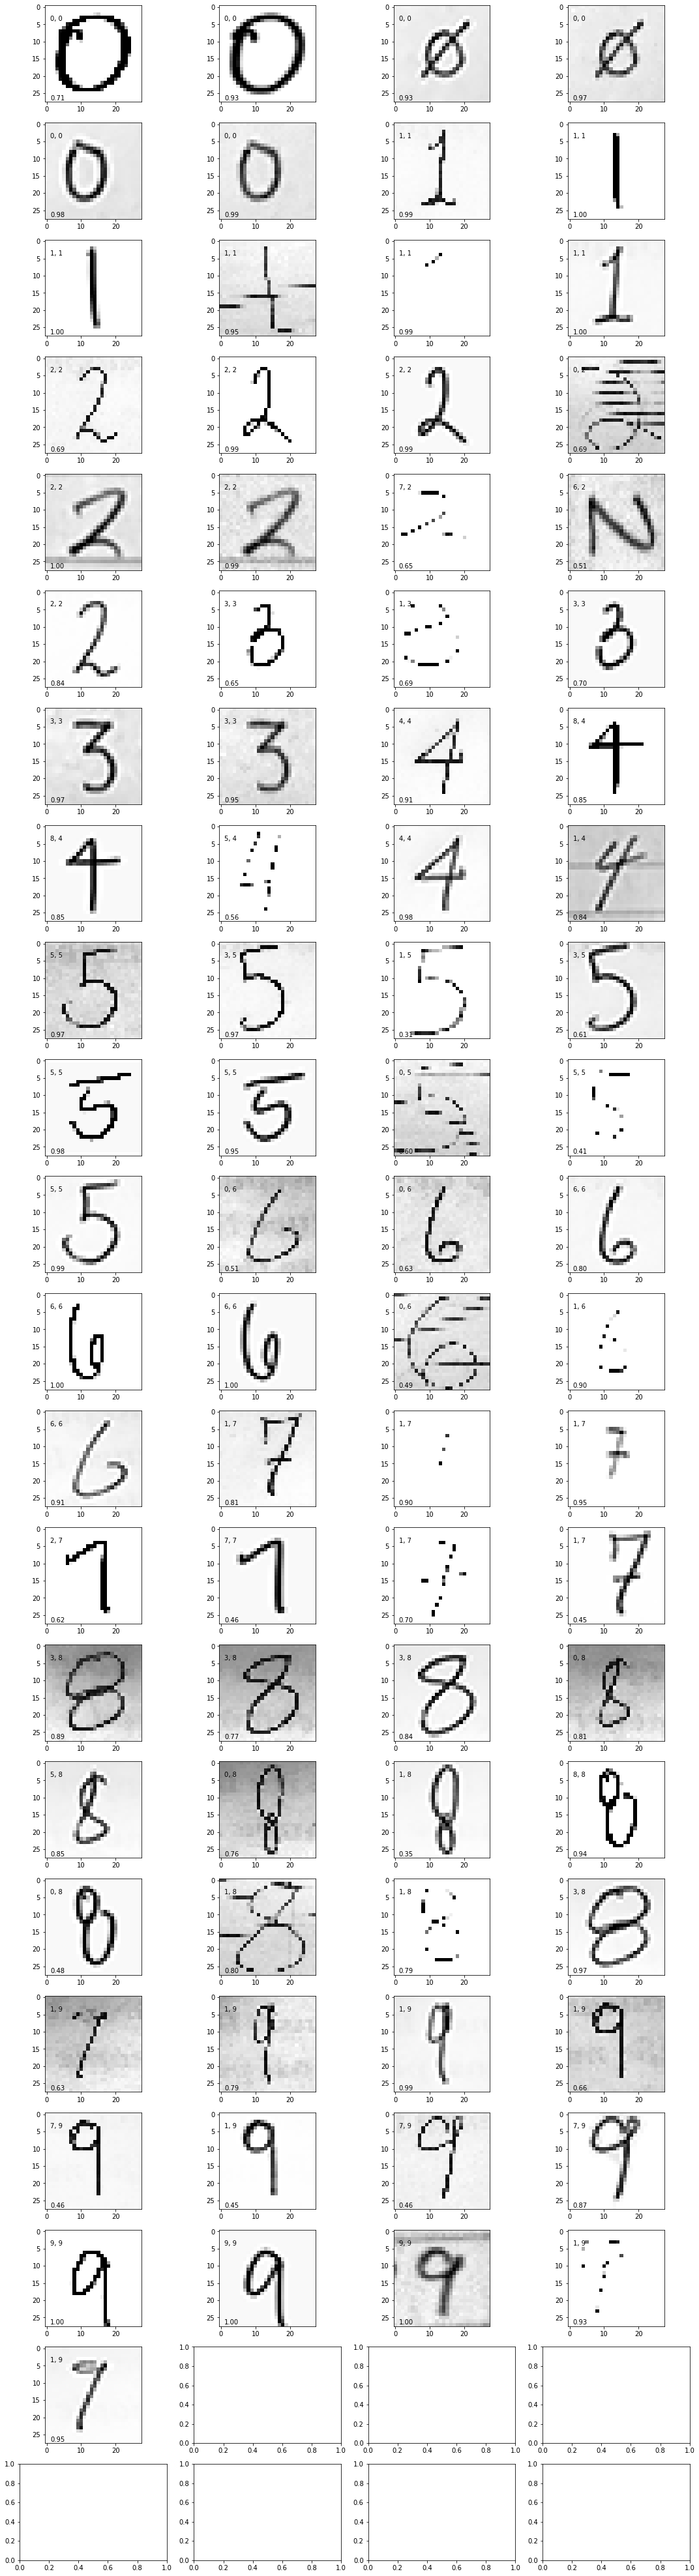

In [35]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(15,55))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()

### Reduce the learning rate

In [36]:
model.optimizer.lr = 0.0002

### Add some noise to the training set to mimic our images

In [180]:
#add some noise to the training images
noisy_training_data = training_data[0].copy()/255.
for idx, x, in enumerate(noisy_training_data):
    noise = np.random.rand(28*28).reshape(28, 28) / 10.
    noisy_training_data[idx] += noise
    

Here's what the noisy data look like:

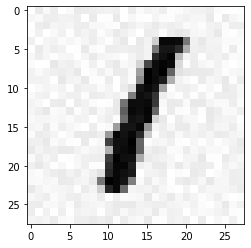

In [163]:
plt.imshow(noisy_training_data[105], cmap='gray_r')

And here's the original data:

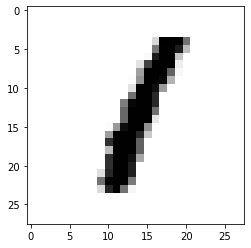

In [40]:
plt.imshow(training_data_images[105], cmap='gray_r')

In [50]:
model.fit(noisy_training_data[:].reshape(-1, 28, 28, 1), training_data[1][:],
         epochs=1)

60000/60000 [==============================] - 4s 68us/sample - loss: 0.0466 - acc: 0.9855


### Try training with a few of our images
Does it help?

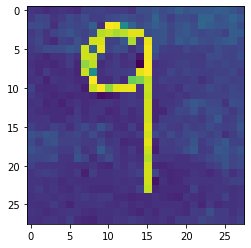

In [134]:
temp = photos.next()
temp_num = temp[0][0]
temp_target = temp[1]
plt.imshow(temp_num.reshape(28,28))

In [135]:
#went through and made sure that 9 was next

model.fit(temp_num.reshape(-1, 28, 28, 1), np.array([temp_target]), epochs = 1)

1/1 [==============================] - 0s 2ms/sample - loss: 1.6889 - acc: 0.0000e+00


In [44]:
photos.reset()
predictions = model.predict_generator(photos)

<Figure size 432x288 with 0 Axes>

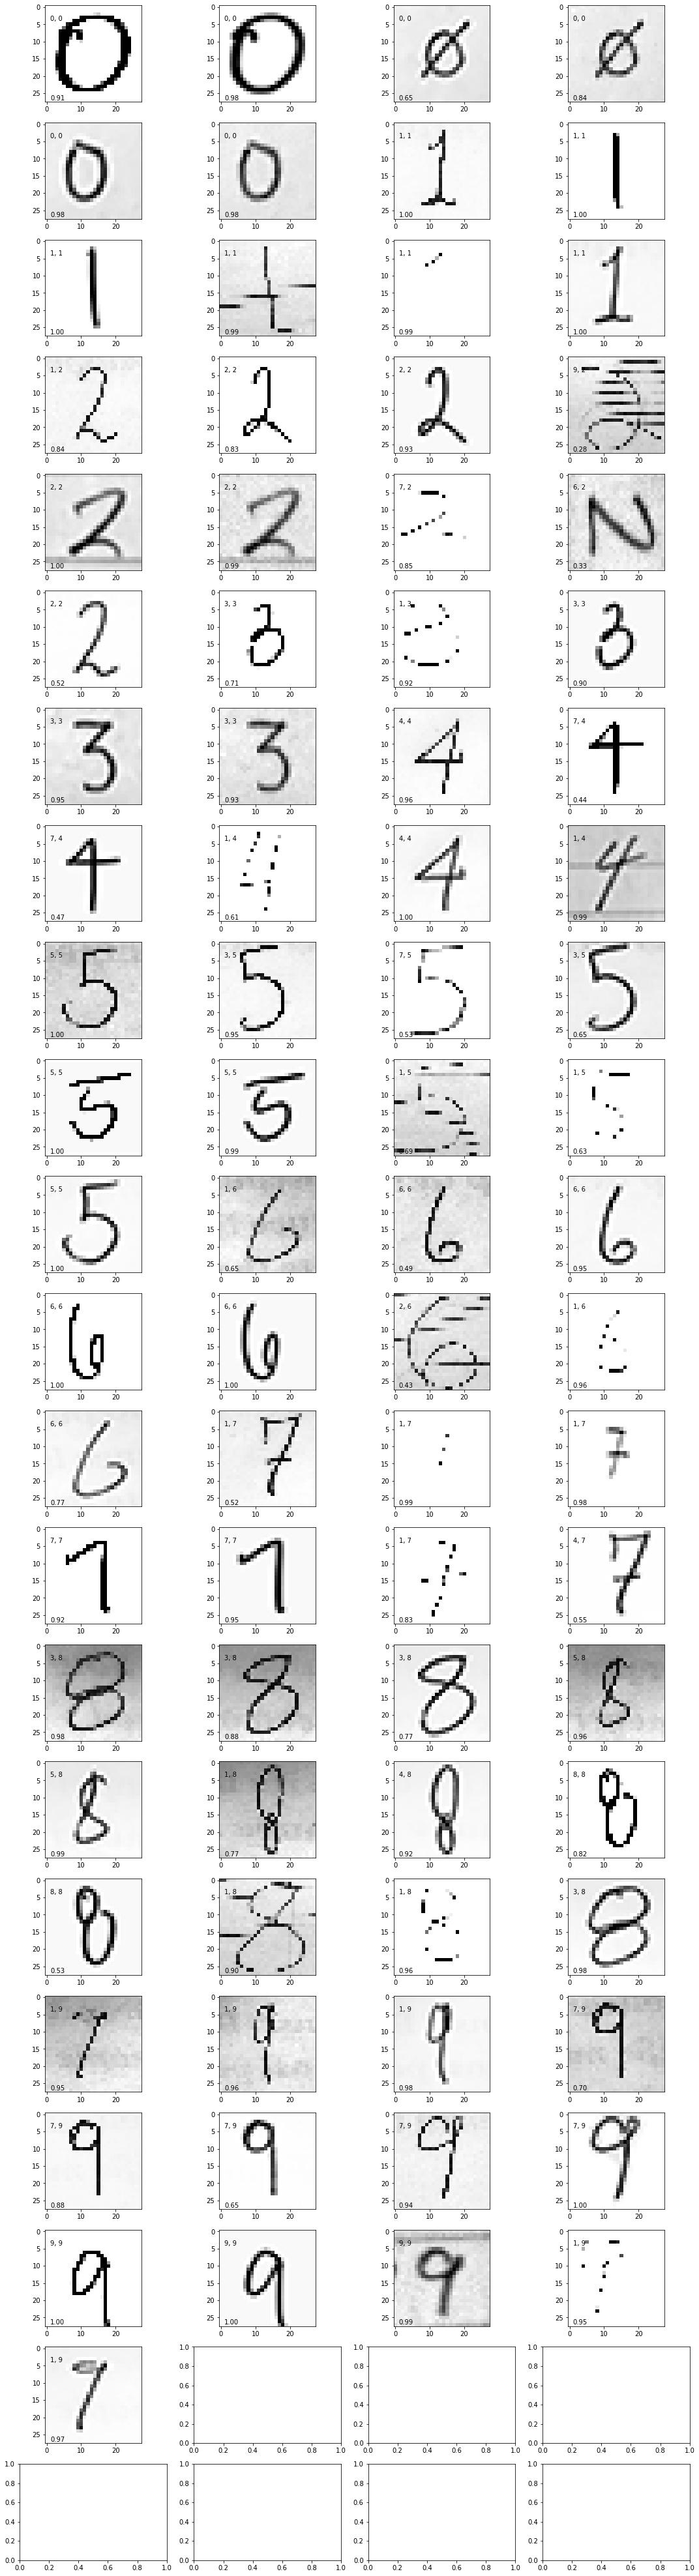

In [45]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(15,55))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()

In [46]:
photos.reset()
photos_targets = photos.classes.copy()
predictions = model.predict_generator(photos)
#Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(photos_targets, y_pred))

### Repeat the noise process a bunch of times

In [197]:
for y in range(10):
    #add some noise to the training images
    noisy_training_data = training_data[0].copy()/255.
    for idx, x, in enumerate(noisy_training_data):
        noise = np.random.rand(28*28).reshape(28, 28) / 10.
        noisy_training_data[idx] += noise
    
    model.fit(noisy_training_data[:].reshape(-1, 28, 28, 1), training_data[1][:],
         epochs=1)

60000/60000 [==============================] - 4s 61us/sample - loss: 0.0648 - acc: 0.9824


### Reclassify the images and check the errors

In [204]:
photos.reset()
photos_targets = photos.classes.copy()
predictions = model.predict_generator(photos)
#Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(photos_targets, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         6
           2       1.00      0.11      0.20         9
           3       0.33      0.20      0.25         5
           4       0.14      0.50      0.21         6
           5       0.80      0.89      0.84         9
           6       1.00      0.62      0.77         8
           7       0.00      0.00      0.00         7
           8       0.50      0.42      0.45        12
           9       0.27      0.31      0.29        13

    accuracy                           0.38        81
   macro avg       0.48      0.37      0.37        81
weighted avg       0.51      0.38      0.39        81



<Figure size 432x288 with 0 Axes>

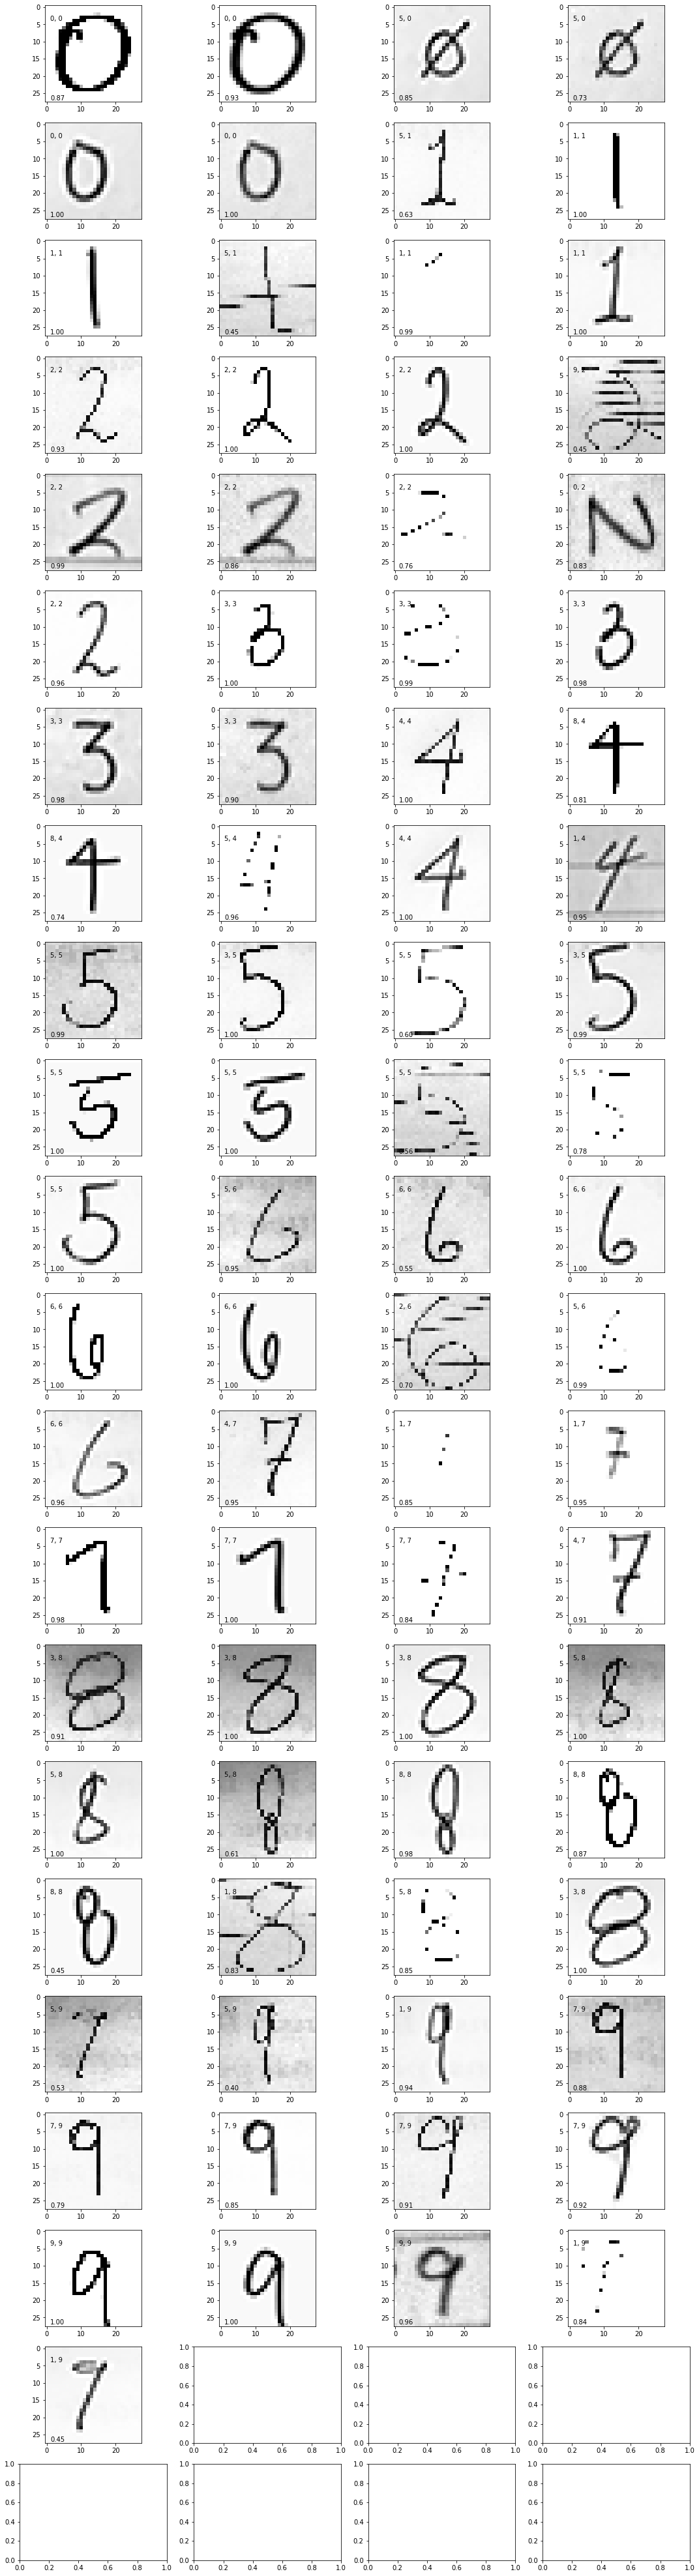

In [199]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(15,55))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()

### Create a generator that will augment the data 
Augmenting the data means it will artificially increase the training set size by modifying the images slightly each time it goes to the model to be learned

In [200]:
input_photos = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = edit_photo,
                                                            width_shift_range = 1,
                                                            height_shift_range = 1,
                                                            rotation_range = 1,
                                                            )
training_photos = input_photos.flow(training_data_images.reshape(-1, 28, 28, 1)/255., training_data_targets)


In [201]:
model.fit(training_photos,
          epochs=5,
          validation_data = (test_data[0].reshape(-1, 28, 28, 1)/255., test_data[1]),
          validation_steps = int(10000/32),
         )

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1975 - acc: 0.6695 - val_loss: 74.8141 - val_acc: 0.6774
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1597 - acc: 0.9549 - val_loss: 136.8357 - val_acc: 0.6624
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1085 - acc: 0.9675 - val_loss: 202.8541 - val_acc: 0.6342
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0906 - acc: 0.9715 - val_loss: 245.1306 - val_acc: 0.6320
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0812 - acc: 0.9752 - val_loss: 295.6701 - val_acc: 0.6218


In [204]:
photos.reset()
photos_targets = photos.classes.copy()
predictions = model.predict_generator(photos)
#Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(photos_targets, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         6
           2       1.00      0.11      0.20         9
           3       0.33      0.20      0.25         5
           4       0.14      0.50      0.21         6
           5       0.80      0.89      0.84         9
           6       1.00      0.62      0.77         8
           7       0.00      0.00      0.00         7
           8       0.50      0.42      0.45        12
           9       0.27      0.31      0.29        13

    accuracy                           0.38        81
   macro avg       0.48      0.37      0.37        81
weighted avg       0.51      0.38      0.39        81



<Figure size 432x288 with 0 Axes>

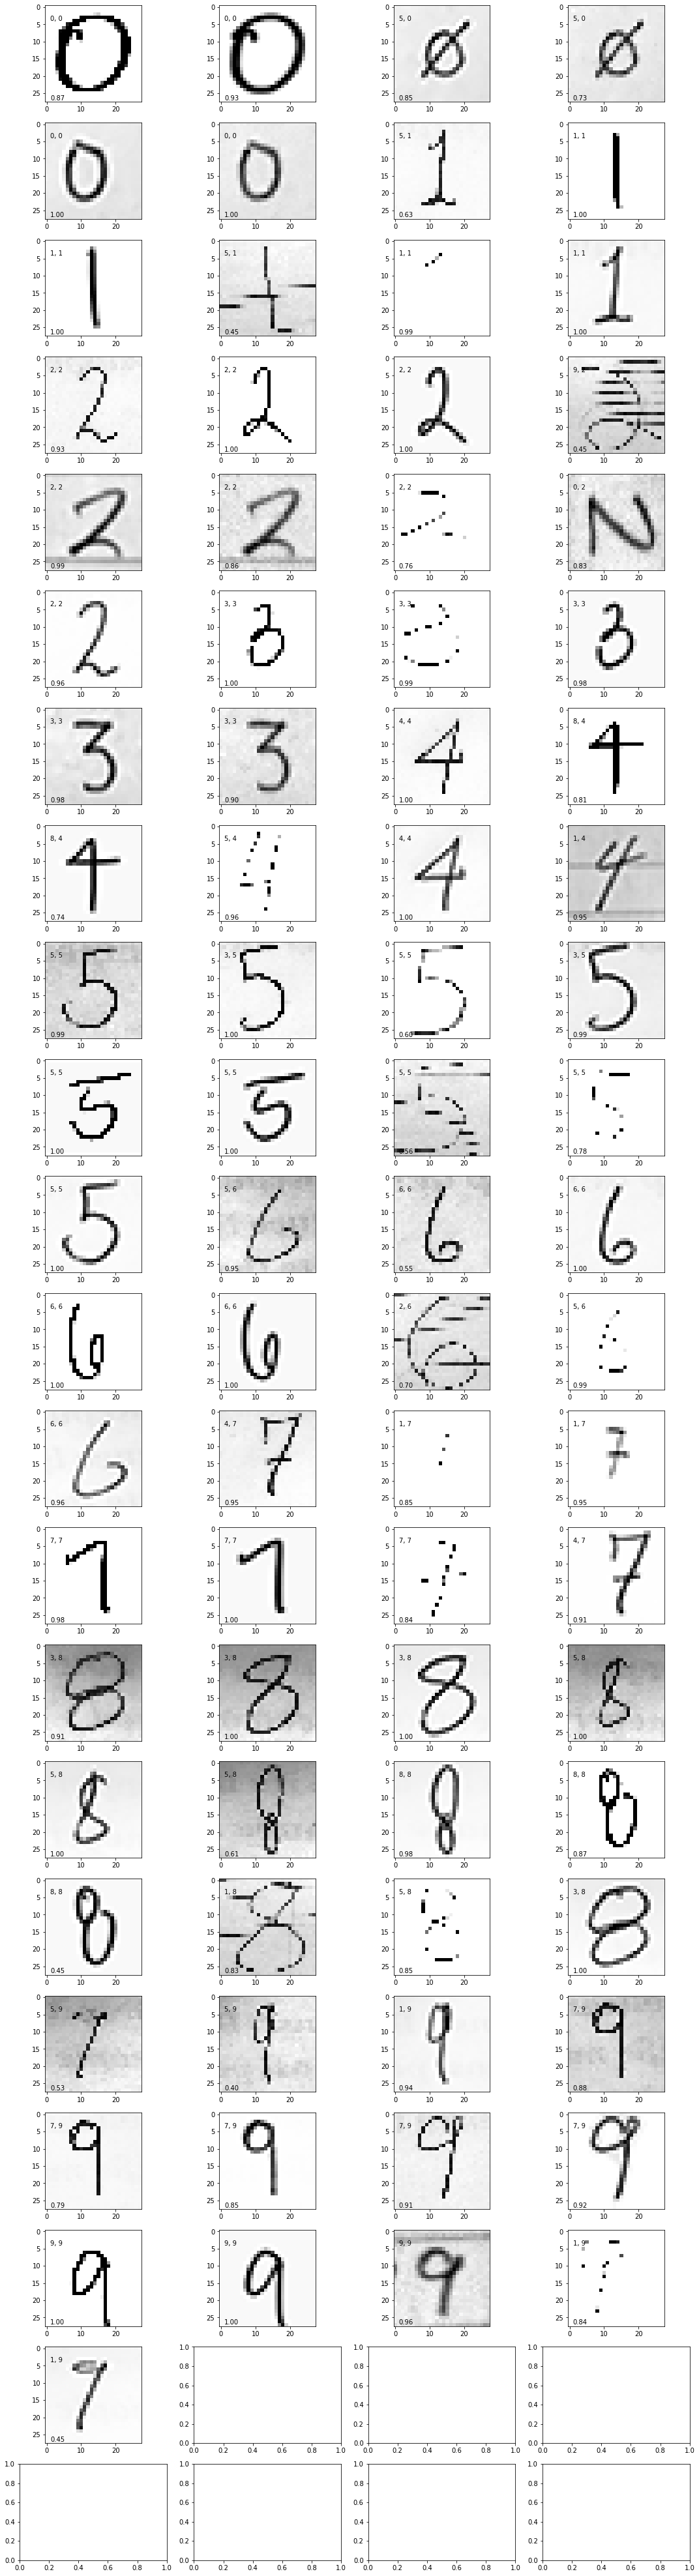

In [199]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(15,55))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()

### Didn't seem to help too much, in fact, in some cases, it will make it worse!

### What if we instead use the noisy data?

In [202]:
input_photos = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = edit_photo,
                                                            width_shift_range = 1,
                                                            height_shift_range = 1,
                                                            rotation_range = 1
                                                            )
training_photos = input_photos.flow(noisy_training_data.reshape(-1, 28, 28, 1), training_data_targets)


In [203]:
model.fit(training_photos,
          epochs=5,
          validation_data = (test_data[0].reshape(-1, 28, 28, 1)/255., test_data[1]),
          validation_steps = int(10000/32),
          )

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0776 - acc: 0.9763 - val_loss: 310.5511 - val_acc: 0.6165 - loss: 0.0776 - acc: 0.9 - ETA: 1s - loss
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0720 - acc: 0.9781 - val_loss: 309.8192 - val_acc: 0.6222
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0693 - acc: 0.9788 - val_loss: 338.0169 - val_acc: 0.6083
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0683 - acc: 0.9786 - val_loss: 392.1771 - val_acc: 0.6036
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0668 - acc: 0.9790 - val_loss: 392.0479 - val_acc: 0.6025


In [204]:
photos.reset()
photos_targets = photos.classes.copy()
predictions = model.predict_generator(photos)
#Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(photos_targets, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         6
           2       1.00      0.11      0.20         9
           3       0.33      0.20      0.25         5
           4       0.14      0.50      0.21         6
           5       0.80      0.89      0.84         9
           6       1.00      0.62      0.77         8
           7       0.00      0.00      0.00         7
           8       0.50      0.42      0.45        12
           9       0.27      0.31      0.29        13

    accuracy                           0.38        81
   macro avg       0.48      0.37      0.37        81
weighted avg       0.51      0.38      0.39        81



<Figure size 432x288 with 0 Axes>

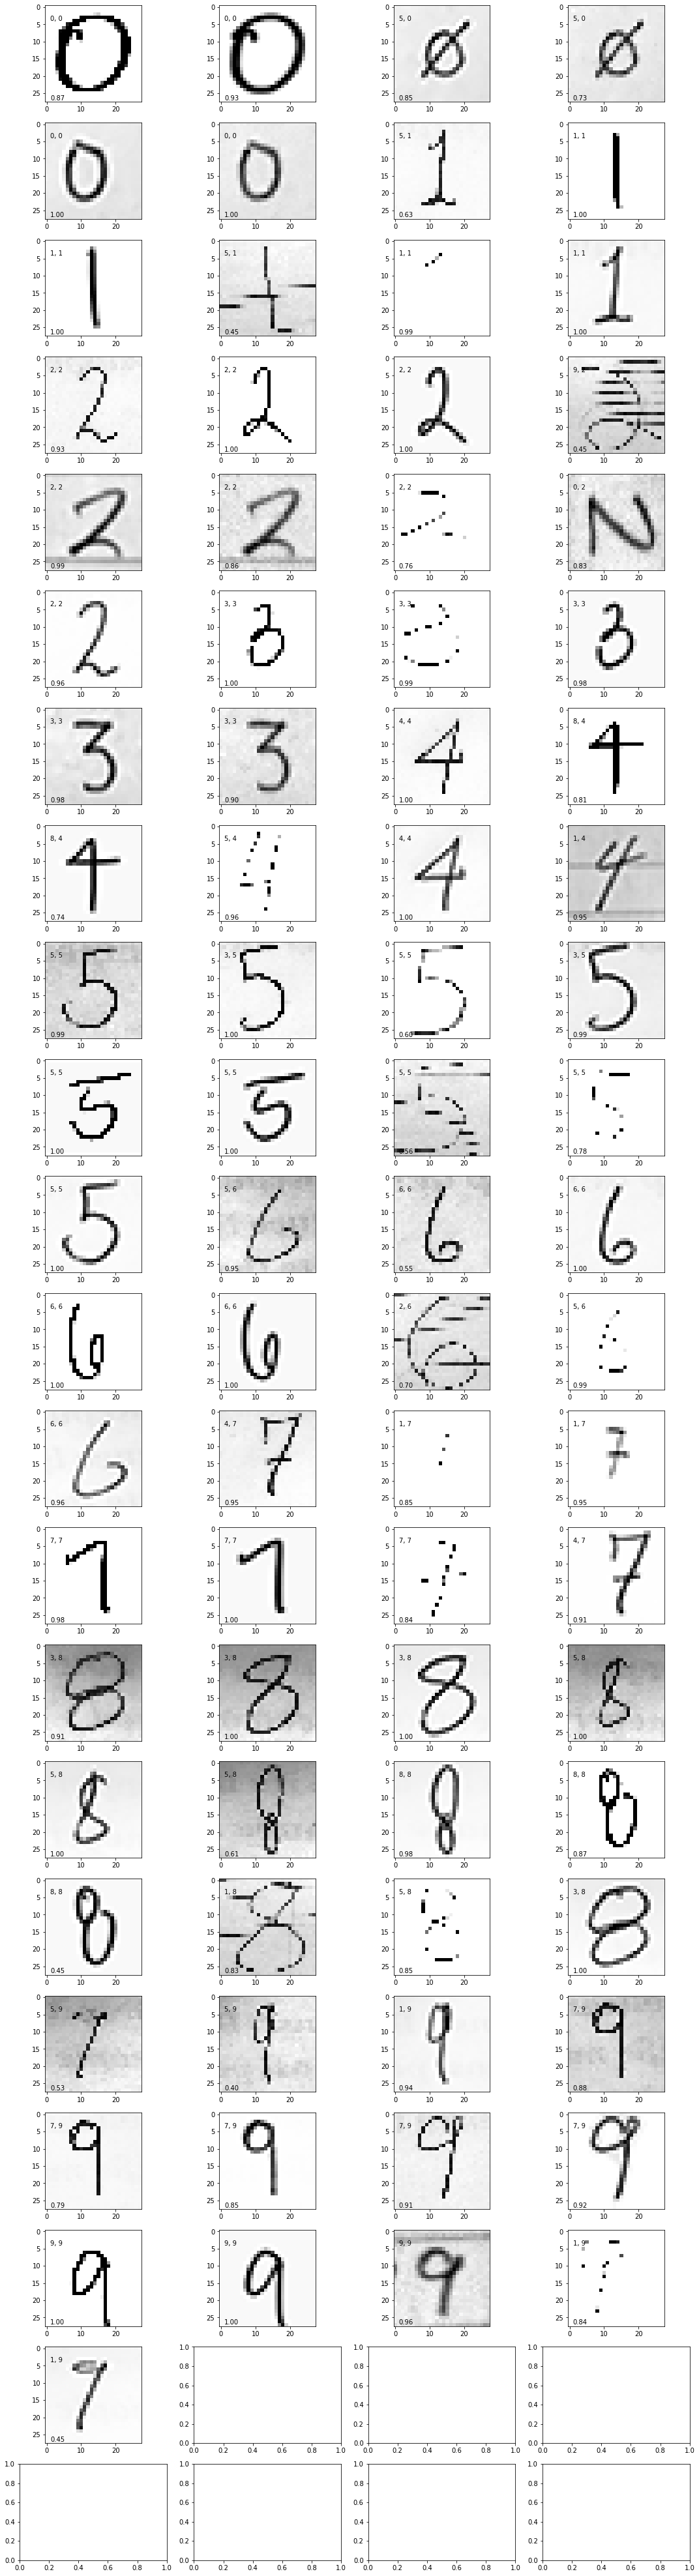

In [199]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(15,55))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()